In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_excel(base_path + "/#20_광고 형식별 광고비 데이터.xlsx")
data

,기간,업종명,TV,라디오,신문,잡지,전체
0,2020-10-01,"금융,보험및증권",10962688,2065599,40379304,883500,54291091.0
1,2020-10-01,컴퓨터및정보통신,24851537,1198757,18368691,407200,44826186.0
2,2020-10-01,관공서및단체,17393171,639298,24332014,496650,42861133.0
3,2020-10-01,가정용품,26706067,1943179,7194598,1202100,37045944.0
4,2020-10-01,가정용전기전자,22248046,393577,8039308,787150,31468082.0
...,...,...,...,...,...,...,...
205,2020-01-01,교육및복지후생,4505739,1133383,2947480,168250,8754852.0
206,2020-01-01,정밀기기및사무기기,10699,388494,2514604,1206610,4120407.0
207,2020-01-01,기초재,102222,387168,3017780,39600,3546770.0
208,2020-01-01,산업기기,31582,61032,1574431,101680,1768725.0


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기간      210 non-null    datetime64[ns]
 1   업종명     210 non-null    object        
 2   TV      210 non-null    int64         
 3   라디오     210 non-null    int64         
 4   신문      210 non-null    int64         
 5   잡지      210 non-null    int64         
 6   전체      205 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 11.6+ KB


In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,TV,라디오,신문,잡지,전체
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.050000e+02
mean,8.874303e+06,9.478718e+05,8.503811e+06,7.750356e+05,1.953640e+07
std,8.639216e+06,8.562672e+05,9.026679e+06,1.206659e+06,1.447557e+07
min,0.000000e+00,0.000000e+00,3.162000e+03,3.060000e+04,9.733360e+05
25%,8.409980e+05,2.374400e+05,2.704456e+06,1.629575e+05,6.464356e+06
50%,7.613180e+06,6.502505e+05,4.843324e+06,3.414250e+05,1.628798e+07
75%,1.369683e+07,1.461744e+06,1.024698e+07,7.790625e+05,2.952118e+07
max,4.219966e+07,3.846472e+06,4.377216e+07,7.687200e+06,6.133524e+07


In [6]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 histplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 histplot이 나뉘는 기준입니다.
x = input("histplot의 x축이 되는 column을 입력하세요 : ")
# bins는 histogram에 출력할 구간의 개수를 의미합니다.
# bins는 정수여야 하기 때문에, int type으로 변환해줍니다.
bins = int(input("histogram을 표현할 bin의 개수를 입력하세요 : "))
# hue는 histplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("histplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

histplot의 x축이 되는 column을 입력하세요 : 전체
histogram을 표현할 bin의 개수를 입력하세요 : 30
histplot의 색상 구분의 기준이 되는 column을 입력하세요 : 기간


In [7]:
# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
print(current_font())

# 여전히 글꼴이 보이지 않는 분들은, 런타임 -> "다시 시작 및 모두 실행" 을 눌러주세요!
fm._rebuild()

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/

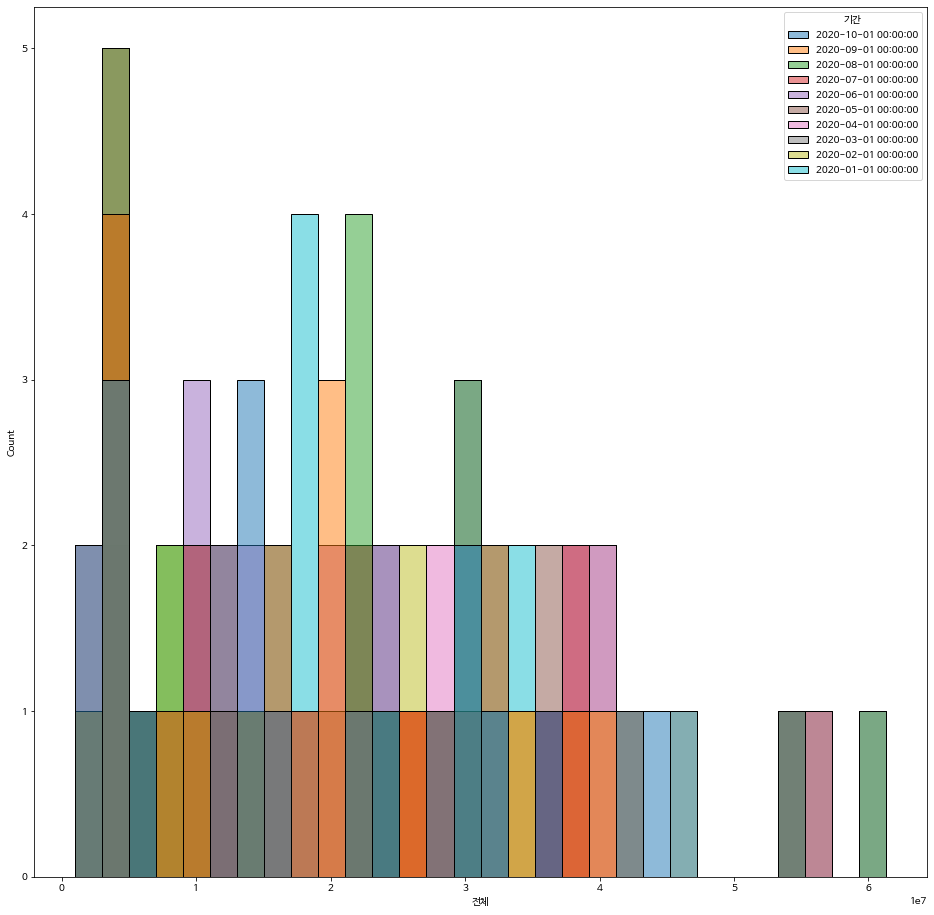

In [8]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# histplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, bins, hue를 기준으로 histplot을 그립니다.
sns.histplot(data=data, x=x, bins=bins, hue=hue)
# plot을 출력합니다.
plt.show()